# Основная информация проекта

## Описание датасета

1. **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
2. **City** — город, в котором находится ресторан;
3. **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
4. **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
5. **Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
6. **Price Range** — диапазон цен в ресторане;
7. **Number of Reviews** — количество отзывов о ресторане;
8. **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
9. **URL_TA** — URL страницы ресторана на TripAdvisor;
10. **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.

**Целевая переменная** - "Rating"

# Импорт библиотек и загрузка данных

In [1996]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

from sklearn.model_selection import train_test_split

In [1997]:
RANDOM_SEED = 42

In [1998]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [1999]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Функции для обработки и анализа данных

In [2000]:
def find_null(col):
    '''Функция подсчёта количества пустых значений в столбцах датасета'''
    empty_values = data[col].isna().sum()
    print(
        f"В столбце '{col}' количество пропусков = {empty_values}.")
    return empty_values

In [2001]:
def last_date(x):
    '''Функция для определния последнего дня отзыва'''
    if len(x) > 0:
        return x[0]
    else:
        return 0

In [2002]:
def row_to_datetime(row):
    '''Функция для преобразования данных в списке в формат даты'''
    new_row = []
    if len(row) > 0:
        for i in row:
            new_row.append(pd.to_datetime(i, errors='coerce'))
        return new_row
    else:
        return []

In [2003]:
def delta_datetime(row):
    '''Функция подсчёта разницы между датами'''
    if len(row) == 2:
        return (row[0]-row[1]).days
    else:
        return 0

In [2004]:
def parsing_all_columns_data(data):
    '''Функция для анализа всех столбцов на количество 
    уникальных значений и количество пропусков'''

    for col in data.columns:
        unique_values = len(data[col].value_counts())
        empty_values = data[col].isna().sum()
        print(
            f"В столбце '{col}' уникальных значений = {unique_values} ,а количество пропусков = {empty_values}.")
        print(
            f'Процент пропусков = {round(empty_values*100/df.shape[0],1)}%')

In [2005]:
def review_to_date(review):
    pattern = re.compile('\'\d+\/\d+\/\d+\'?')
    dat = pattern.findall(review)
    if len(dat) >= 2:
        datetime_list = []
        for date in dat:
            date = date[1:-1]
            dt = datetime.strptime(date, '%m/%d/%Y')
            datetime_list.append(dt)
        return datetime_list
    else:
        return (dat)

In [2006]:
def last_date(x):
    if len(x) > 0:
        return x[0]
    else:
        return 0

In [2007]:
def delta_datetime(row):
    if len(row) == 2:
        return (row[0]-row[1]).days
    else:
        return 0

In [2008]:
def rating(prediction):
        if prediction < 0.25:
            return 0
        elif 0.25 < prediction <= 0.75:
            return 0.5
        elif 0.75 < prediction <= 1.25:
            return 1
        elif 1.25 <prediction <= 1.75:
            return 1.5
        elif 1.75 < prediction <= 2.25:
            return 2
        elif 2.25 < prediction <= 2.75:
            return 2.5
        elif 2.75 < prediction <= 3.25:
            return 3
        elif 3.25 < prediction <= 3.75:
            return 3.5
        elif 3.75 < prediction <= 4.25:
            return 4
        elif 4.25 < prediction <= 4.75:
            return 4.5
        else:
            return 5

In [2009]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['restaurant_id','id_ta',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    #df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

# Обзор данных

In [2010]:
display(df_train.head(5))
df_train.info()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [2011]:
display(df_test.head(5))
df_test.info()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [2012]:
display(sample_submission.head(5))
sample_submission.info()

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [2013]:
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True)

In [2014]:
display(data.head(5))
data.info()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [2015]:
# Вывод количества строк и столбцов таблицы
print(
    f'Датасет состоит из {data.shape[0]} строк и {data.shape[1]} столбцов')

Датасет состоит из 50000 строк и 11 столбцов


In [2016]:
# Приведём наименования колонок в общий вид
data.columns = map(str.lower, data.columns.str.replace(' ','_',regex=True))

# Работа с данными

## 1. Обработка NAN

In [2017]:
data['number_of_price_range_isnan'] = pd.isna(data['price_range']).astype('uint8')

In [2018]:
data['number_of_price_range_isnan']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    1
49998    0
49999    0
Name: number_of_price_range_isnan, Length: 50000, dtype: uint8

In [2019]:
display(data['price_range'].unique())
display(data['price_range'].value_counts())

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

Исходя из количества уникальных значений, можно сделать вывод, что самый распространенный диапозон цен = от 2-3. Заполним пропуски этим значением

In [2020]:
data['price_range'].fillna('$$ - $$$', inplace=True)

In [2021]:
data['number_of_reviews_isnan'] = pd.isna(data['number_of_reviews']).astype('uint8')

In [2022]:
data['number_of_reviews_isnan']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: number_of_reviews_isnan, Length: 50000, dtype: uint8

In [2023]:
# Заполним пропуски средним значением по городам и ценам
data['number_of_reviews'] = data.groupby(['city','price_range'])['number_of_reviews'].transform(
    lambda group: group.fillna(round(group.mean())))

In [2024]:
data['cuisine_style_isnan'] = pd.isna(data['cuisine_style']).astype('uint8')

In [2025]:
data['cuisine_style_isnan']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: cuisine_style_isnan, Length: 50000, dtype: uint8

In [2026]:
data['cuisine_style'] = data['cuisine_style'].apply(lambda x: eval(x) if not pd.isna(x) else 'Unknown')

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [2027]:
parsing_all_columns_data(data)

В столбце 'restaurant_id' уникальных значений = 13094 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'city' уникальных значений = 31 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'cuisine_style' уникальных значений = 10732 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'ranking' уникальных значений = 12975 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'price_range' уникальных значений = 3 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'number_of_reviews' уникальных значений = 1574 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'reviews' уникальных значений = 41857 ,а количество пропусков = 2.
Процент пропусков = 0.0%
В столбце 'url_ta' уникальных значений = 49963 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'id_ta' уникальных значений = 49963 ,а количество пропусков = 0.
Процент пропусков = 0.0%
В столбце 'sample' уникальных значений = 2 ,а количество пропусков = 0

In [2078]:
data = pd.get_dummies(data, columns=['city',], dummy_na=True)

In [2079]:
data.head(5)

,restaurant_id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
0,id_0,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [2030]:
dict_value_price = {'$':1,'$$ - $$$':2,'$$$$':3}
data['price_range'] = data['price_range'].map(lambda x: dict_value_price.get(x,x))

In [2031]:
data['number_of_cuisine'] = data['cuisine_style'].apply(len)

In [2067]:
data['int_id_ta'] = data['id_ta'].str[1:].astype(float)

In [2066]:
data['int_restaurant_id'] = data['restaurant_id'].str[3:].astype(float)

In [2065]:
data['int_url_ta'] = data['url_ta'].str[20:26].astype(float)

In [2034]:
data['reviews'] = data['reviews'].astype(str)
data['review_dates'] = data['reviews'].apply(lambda x: review_to_date(x))

In [2068]:
data['last_reviews_date'] = data['review_dates'].apply(last_date)

In [2069]:
data['delta_datetime'] = data['review_dates'].apply(delta_datetime)

# EDA 

### Посмотрим распределение признака

<AxesSubplot:>

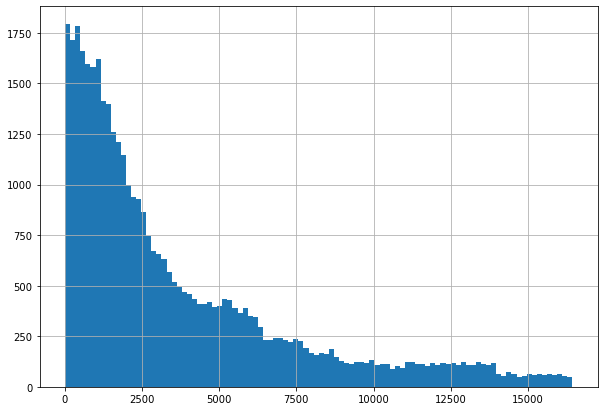

In [2037]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

<AxesSubplot:>

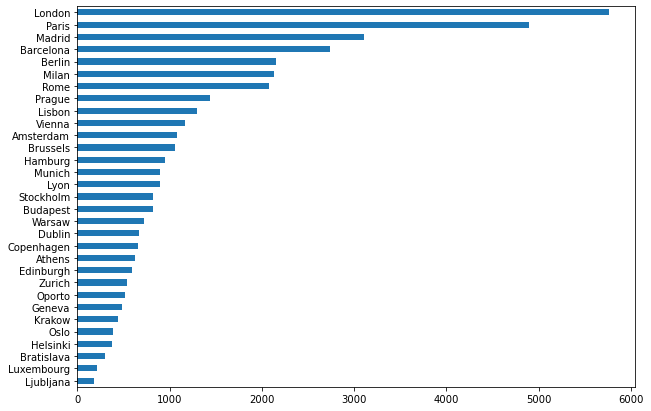

In [2038]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

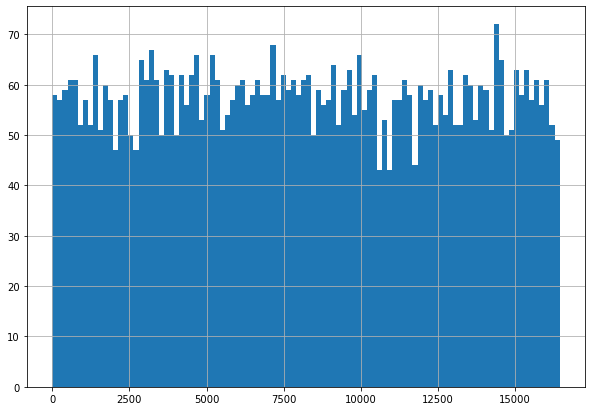

In [2039]:
df_train['Ranking'][df_train['City']=='London'].hist(bins=100)

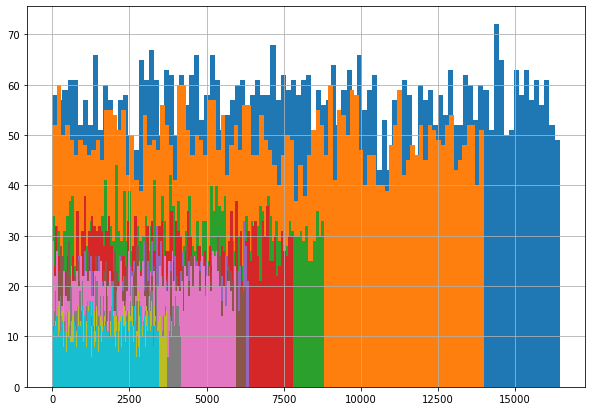

In [1349]:
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City']==x].hist(bins=100)
plt.show()

### Посмотрим распределение целевой переменной

<AxesSubplot:>

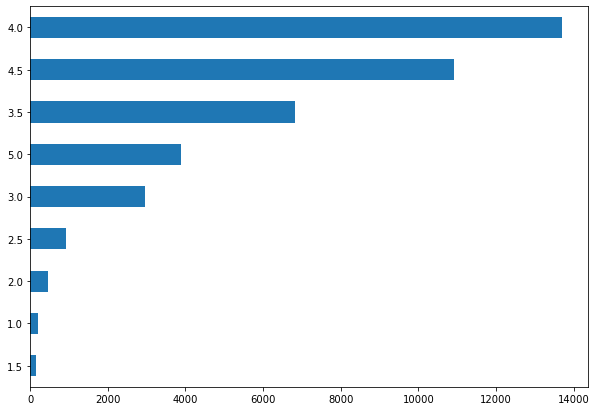

In [2040]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

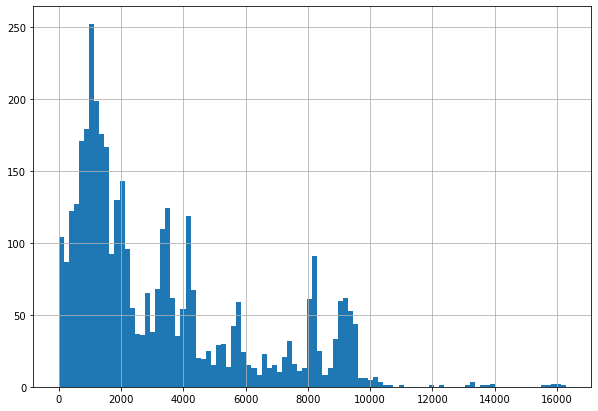

In [2041]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

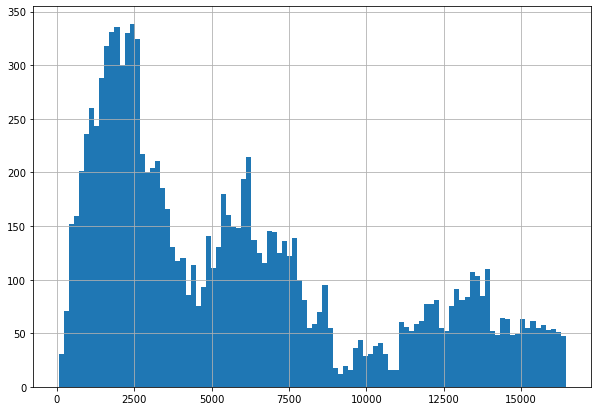

In [2042]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

<AxesSubplot:>

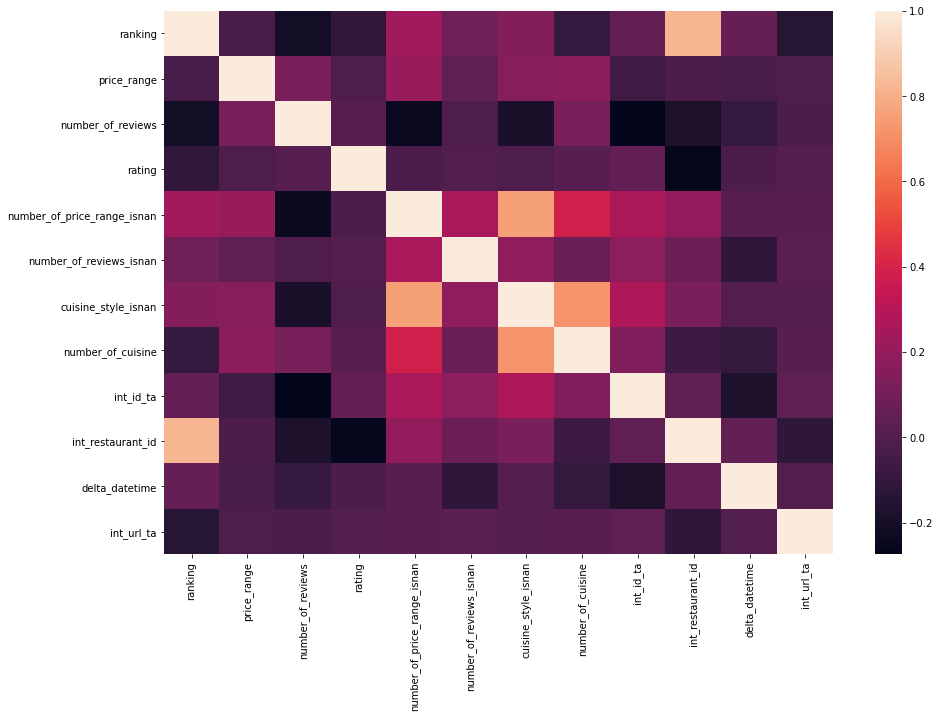

In [2070]:
plt.figure(figsize=(15,10))
sns.heatmap(data.drop(['sample'],axis=1).corr(),)

# Data Preprocessing

In [2080]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,ranking,price_range,number_of_reviews,sample,rating,number_of_price_range_isnan,number_of_reviews_isnan,cuisine_style_isnan,number_of_cuisine,int_id_ta,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
31650,5933.0,2,108.0,1,3.5,0,0,0,3,8802035.0,...,0,0,1,0,0,0,0,0,0,0
19731,3736.0,2,49.0,1,4.0,0,0,0,1,3400483.0,...,0,0,0,0,1,0,0,0,0,0
25345,2913.0,2,23.0,1,4.0,1,0,1,7,11491893.0,...,0,0,0,0,0,0,0,0,0,0
43250,1525.0,1,34.0,1,3.5,0,0,0,3,1124652.0,...,0,0,0,0,0,0,0,1,0,0
22151,4311.0,2,69.0,1,3.5,0,0,0,1,3512248.0,...,0,0,0,0,0,0,0,0,0,0
42552,1330.0,2,3.0,1,3.5,1,0,1,7,8616268.0,...,0,0,0,0,0,0,0,0,0,0
15357,1428.0,2,34.0,1,3.5,1,0,1,7,11586956.0,...,0,0,0,0,0,0,0,0,0,0
19441,12172.0,2,9.0,1,3.5,1,0,1,7,4935403.0,...,0,0,1,0,0,0,0,0,0,0
41603,2959.0,2,65.0,1,4.0,0,0,0,3,4327697.0,...,0,0,0,0,0,0,0,0,0,0
29580,3606.0,2,2.0,1,3.0,1,0,0,1,3844219.0,...,0,0,0,0,0,0,0,0,0,0


In [2081]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

In [2082]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [2083]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 44), (40000, 44), (40000, 43), (32000, 43), (8000, 43))

# Model 
Сам ML

In [2048]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [2084]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [2085]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

for i in range(y_pred.size):
    y_pred[i]=rating(y_pred[i])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [2086]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.180625


In [2052]:
y_pred

array([4.5, 4. , 4. , ..., 4.5, 4. , 4. ])

<AxesSubplot:>

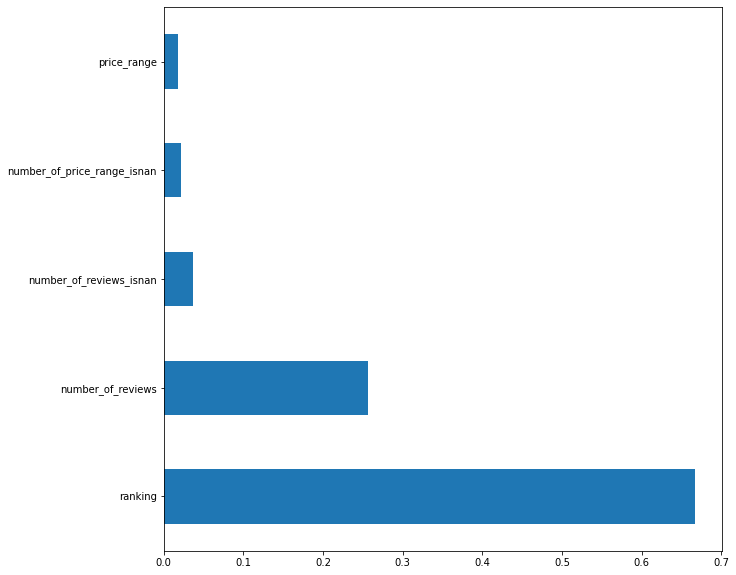

In [1594]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [1363]:
test_data.sample(10)

,ranking,price_range,number_of_reviews,rating,number_of_reviews_isnan,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Bratislava,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
4489,376.0,2,41.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,2341.0,2,2.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7751,4036.0,2,2.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6646,842.0,2,10.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5181,4996.0,1,18.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9853,12789.0,2,4.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3445,4819.0,2,8.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
84,251.0,2,95.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,6728.0,2,55.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8749,2003.0,2,7.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1365]:
test_data = test_data.drop(['rating'], axis=1)

In [1371]:
sample_submission

,Restaurant_id,Rating,rating
0,id_0,3.005,3.005
1,id_1,4.305,4.305
2,id_2,4.530,4.530
3,id_3,4.200,4.200
4,id_4,4.485,4.485
...,...,...,...
9995,id_9995,4.505,4.505
9996,id_9996,4.070,4.070
9997,id_9997,3.010,3.010
9998,id_9998,4.500,4.500


In [1367]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1368]:
predict_submission

array([3.005, 4.305, 4.53 , ..., 3.01 , 4.5  , 4.325])

In [1370]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating,rating
0,id_0,3.005,3.005
1,id_1,4.305,4.305
2,id_2,4.530,4.530
3,id_3,4.200,4.200
4,id_4,4.485,4.485
5,id_5,4.635,4.635
6,id_6,1.770,1.770
7,id_7,3.375,3.375
8,id_8,4.110,4.110
9,id_9,4.780,4.780


# Вопросы

# 4.3 Вопросы о кухнях

In [1757]:
test = data.copy()
test.head(2)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_reviews_isnan,number_of_price_range_isnan,number_of_cuisine,int_id_ta,int_restaurant_id
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,2,10746918,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,5,6674944,1


In [948]:
#data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x : re.findall(r'\w+',x) if not pd.isna(x) else ['Unknown'])

In [1759]:
test['cuisine_style'] = test['cuisine_style'].apply(lambda x : re.sub(r"[]['']",'',x) if not pd.isna(x) else 'Unknown')

TypeError: expected string or bytes-like object

In [1760]:
test['cuisine_style'] = test['cuisine_style'].apply(lambda x : re.findall(r'\w+',x) if not pd.isna(x) else ['Unknown'])
test.head(2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1761]:
test['cuisine_style'] = test['cuisine_style'].apply(lambda x: eval(x) if not pd.isna(x) else 'Unknown')
test.head(2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1762]:
test['number_of_cuisine'] = test['cuisine_style'].apply(len)
test.head(2)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_reviews_isnan,number_of_price_range_isnan,number_of_cuisine,int_id_ta,int_restaurant_id
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,2,10746918,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,5,6674944,1


In [1646]:
test.cuisine_style.explode().unique()

array(['Bar', 'Pub', 'European', 'Scandinavian', 'Gluten Free Options',
       'Vegetarian Friendly', 'Vegan Options', 'Italian', 'Mediterranean',
       'Seafood', 'French', 'Cafe', 'Fast Food', 'Portuguese', 'Unknown',
       'Greek', 'Czech', 'Eastern European', 'Central European', 'Pizza',
       'British', 'Spanish', 'Norwegian', 'African', 'Moroccan',
       'Middle Eastern', 'Halal', 'Indian', 'Thai', 'Dutch', 'Welsh',
       'American', 'Steakhouse', 'Soups', 'Scottish', 'Fusion',
       'Street Food', 'Hungarian', 'Asian', 'Wine Bar', 'Barbecue',
       'Central American', 'Peruvian', 'South American', 'Irish',
       'Polish', 'Vietnamese', 'Lebanese', 'Turkish', 'Healthy',
       'Japanese', 'Sushi', 'Austrian', 'Chinese', 'Danish',
       'International', 'Gastropub', 'Korean', 'German', 'Contemporary',
       'Arabic', 'Diner', 'Swiss', 'Swedish', 'Persian', 'Australian',
       'Grill', 'Mexican', 'Latin', 'Belgian', 'Argentinean', 'Tunisian',
       'Russian', 'Nepali', 

In [1648]:
summ = 0
for i in test['cuisine_style']:
    #print(len(i))
    summ += len(i)

In [1650]:
summ/test.shape[0]

4.01612

In [1634]:
t = Counter(test['cuisine_style'].str.split(', ').sum())

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [1619]:
len(t) - 1

125

## Какая кухня представлена в наибольшем количестве ресторанов?

In [953]:
t.most_common(1)

[('Vegetarian Friendly', 11189)]

In [954]:
# data.head(8)

## Какое среднее количество кухонь предлагается в одном ресторане?

In [955]:
test['cuisine_style'] = test['cuisine_style'].str.split(', ')

In [956]:
test.head(2)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,[Unknown],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032


In [1639]:
summ = 0
for i in test['cuisine_style']:
    summ += len(i)

In [1640]:
summ/test.shape[0]

4.01612

# 4.4 Вопросы об отзывах

In [1768]:
data['reviews'][0]

'[[], []]'

In [400]:
#test['Reviews'] = test['Reviews'].apply(lambda x : re.sub(r"[]['']",'',x) if not pd.isna(x) else 'Unknown')

In [530]:
# test['Reviews'].apply(lambda x : re.sub(r"['][']",'',x))

In [486]:
#pattern = re.compile('\d+\/\d+\/\d+')
#test['Reviews_date'] = test['Reviews'].apply(lambda x: pattern.findall(x))

In [471]:
#d = test['Reviews'].str.replace('[]['']','').str.split(', ')

In [487]:
#d[0][:2:]

In [678]:
#test['reviews'] = test['reviews'].apply(lambda x : re.sub(r"[]['']",'',x)).str.split(', ')

In [679]:
#print(dd[39995][:2:])
#print(dd[39995][2::])

['The real Italian experience!', 'Wonderful food']
['wonderful experience', '12/16/2017', '11/12/2017']


In [680]:
def test2(row):    
    return row[-int(len(row)/2)::]

In [681]:
def test3(row):
    return row[:int(len(row)/2):]

In [553]:
#test['reviews'].apply(test2)

0                              [12/31/2017, 11/20/2017]
1                              [07/06/2017, 06/19/2016]
2                              [01/08/2018, 01/06/2018]
3                                                    []
4                              [11/18/2017, 02/19/2017]
                              ...                      
39995    [wonderful experience, 12/16/2017, 11/12/2017]
39996                          [12/21/2017, 12/12/2017]
39997                          [11/03/2016, 04/12/2008]
39998                          [07/11/2017, 06/18/2017]
39999                          [01/31/2016, 07/04/2012]
Name: Reviews, Length: 40000, dtype: object

In [560]:
#test['reviews'].apply(test3)

0        [Good food at your doorstep, A good hotel rest...
1                [Unique cuisine, Delicious Nepalese food]
2                 [Catch up with friends, Not exceptional]
3                                                       []
4        [Best place to try a Bavarian food, Nice build...
                               ...                        
39995       [The real Italian experience!, Wonderful food]
39996    [Parisian atmosphere, Bit pricey but interesti...
39997    [Good by swedish standards, A hidden jewel in ...
39998    [Underground restaurant, Oldest Restaurant in ...
39999                          [Average, Nice an informal]
Name: Reviews, Length: 40000, dtype: object

In [1877]:
test = data.copy()
test['reviews'][0]

'[[], []]'

In [1883]:
pattern = re.compile('\d+\/\d+\/\d+')
test['reviews_date'] = test['reviews'].apply(lambda x: pattern.findall(str(x)))

In [1890]:
len(test['reviews_date'][0])

0

In [1856]:
pattern = re.compile('\d+\/\d+\/\d+')
test['reviews_date'] = test['reviews'].apply(lambda x: pattern.findall(x) if not pd.isna(x) else x)

In [1893]:
test['last_reviews_date'] = test['reviews_date'].apply(lambda x: last_date(x))

In [1849]:
pd.to_datetime(test['reviews_date']).dt.date

TypeError: unhashable type: 'list'

In [1850]:
def last_date(x):
    if len(x) > 0:
        return x[0]
    else:
        return 0

In [1851]:
test['last_reviews_date'] = test['reviews_date'].apply(last_date)

TypeError: object of type 'float' has no len()

In [1894]:
test['last_reviews_date'] = pd.to_datetime(test['last_reviews_date'],errors='coerce')

In [1895]:
test['last_reviews_date'] = test['last_reviews_date'].apply(lambda x: datetime.strftime(x,'%Y-%m-%d'))

In [1896]:
test.last_reviews_date.sort_values(ascending=False)

35110    2018-02-26
27447    2018-02-26
39251    2018-02-26
29050    2018-02-26
28511    2018-02-26
            ...    
21626    1970-01-01
21617    1970-01-01
21615    1970-01-01
21602    1970-01-01
0        1970-01-01
Name: last_reviews_date, Length: 50000, dtype: object

In [967]:
type(test['reviews_date'][0][0])

str

In [1026]:
def t(row):
    new_row = []
    if len(row)>0:
        for i in row:
            new_row.append(pd.to_datetime(i,errors='coerce'))
        return new_row
    else:
        return []

In [1027]:
tt = test.copy()

In [1028]:
tt['reviews_date'] = tt['reviews_date'].apply(t)

In [997]:
type(tt['reviews_date'][0][0])

str

In [1087]:
tt['restaurant_id'].value_counts()

id_436      18
id_871      18
id_227      18
id_633      18
id_430      17
            ..
id_10197     1
id_10886     1
id_12426     1
id_14430     1
id_15967     1
Name: restaurant_id, Length: 11909, dtype: int64

In [1044]:
for row in tt['reviews_date']:
    if len(row)==2:
        print((row[0]-row[1]).days)
    elif len(row) == 1:
        print(row)

41
382
2
272
108
-93
613
225
23
11
56
78
[Timestamp('2017-04-12 00:00:00')]
120
299
243
8
98
57
89
[Timestamp('2016-07-05 00:00:00')]
[Timestamp('2017-01-26 00:00:00')]
[Timestamp('2011-08-20 00:00:00')]
27
241
[Timestamp('2015-10-26 00:00:00')]
194
489
[Timestamp('2015-03-08 00:00:00')]
[Timestamp('2017-05-12 00:00:00')]
81
100
-299
164
1
-180
32
25
82
51
0
[Timestamp('2016-03-19 00:00:00')]
[Timestamp('2014-11-10 00:00:00')]
[Timestamp('2012-04-13 00:00:00')]
66
88
106
0
4
357
51
11
193
698
[Timestamp('2014-12-09 00:00:00')]
1
256
35
12
99
[Timestamp('2016-09-04 00:00:00')]
5
75
373
1
140
52
423
65
445
9
56
[Timestamp('2016-10-14 00:00:00')]
94
79
136
100
17
124
145
248
189
129
84
33
664
22
445
288
3
1086
112
120
80
21
18
98
308
0
41
40
48
8
204
25
[Timestamp('2014-08-04 00:00:00')]
43
147
169
739
3
139
128
-225
257
8
46
121
0
18
70
6
188
[Timestamp('2017-12-07 00:00:00')]
[Timestamp('2018-02-09 00:00:00')]
9
36
32
49
46
8
0
11
294
63
59
235
48
[Timestamp('2013-03-16 00:00:00')]
-214

132
[Timestamp('2016-11-03 00:00:00')]
91
285
0
1
86
-149
63
60
514
26
2
271
-72
8
1
[Timestamp('2016-07-09 00:00:00')]
[Timestamp('2017-04-11 00:00:00')]
145
1
91
144
-99
24
82
210
1355
46
40
17
30
72
58
538
7
114
144
173
62
[Timestamp('2017-07-14 00:00:00')]
6
25
30
[Timestamp('2016-08-28 00:00:00')]
114
196
145
[Timestamp('2015-06-24 00:00:00')]
12
375
40
110
207
773
3
[Timestamp('2016-12-15 00:00:00')]
12
[Timestamp('2017-10-21 00:00:00')]
[Timestamp('2017-01-05 00:00:00')]
48
101
430
4
33
205
594
62
-223
54
-116
680
8
99
7
4
83
21
11
39
558
32
19
1074
[Timestamp('2016-08-20 00:00:00')]
[Timestamp('2016-04-26 00:00:00')]
1
59
349
6
25
17
0
22
27
101
18
[Timestamp('2017-08-23 00:00:00')]
263
136
-55
25
183
31
26
141
2
225
101
1
26
38
37
16
529
10
36
183
28
61
279
217
166
35
92
46
14
[Timestamp('2015-09-17 00:00:00')]
42
339
[Timestamp('2012-03-21 00:00:00')]
[Timestamp('2016-07-17 00:00:00')]
37
113
4
91
[Timestamp('2016-09-05 00:00:00')]
0
7
63
436
[Timestamp('2014-06-20 00:00:00')

-282
7
17
379
153
190
[Timestamp('2018-01-06 00:00:00')]
104
[Timestamp('2017-08-06 00:00:00')]
[Timestamp('2017-07-16 00:00:00')]
43
-215
635
[Timestamp('2017-12-04 00:00:00')]
[Timestamp('2017-01-13 00:00:00')]
12
6
78
43
-285
166
[Timestamp('2017-01-21 00:00:00')]
290
115
49
33
-120
-241
128
7
128
45
468
87
101
3
63
77
134
200
1
64
105
26
96
3
30
1818
[Timestamp('2014-10-13 00:00:00')]
91
21
309
144
80
32
34
443
29
[Timestamp('2013-10-11 00:00:00')]
-200
[Timestamp('2016-01-15 00:00:00')]
143
[Timestamp('2013-09-03 00:00:00')]
26
55
26
95
[Timestamp('2017-04-10 00:00:00')]
-325
114
296
82
361
398
167
300
60
6
88
5
2
141
724
179
10
30
76
23
20
[Timestamp('2017-06-21 00:00:00')]
35
[Timestamp('2015-11-30 00:00:00')]
27
1
133
124
38
229
24
216
993
78
[Timestamp('2016-03-03 00:00:00')]
64
46
[Timestamp('2014-09-11 00:00:00')]
28
40
[Timestamp('2016-12-01 00:00:00')]
143
3
133
2
33
4
44
21
105
10
2
12
11
[Timestamp('2017-09-26 00:00:00')]
[Timestamp('2015-11-09 00:00:00')]
[Timestamp('20

169
17
[Timestamp('2017-08-28 00:00:00')]
[Timestamp('2015-12-24 00:00:00')]
72
-1
110
[Timestamp('2015-04-28 00:00:00')]
65
8
700
104
149
170
[Timestamp('2015-09-23 00:00:00')]
33
33
97
-259
1
[Timestamp('2016-10-03 00:00:00')]
108
3
688
[Timestamp('2016-07-03 00:00:00')]
135
10
241
39
164
708
85
293
81
14
108
172
26
195
188
[Timestamp('2017-11-24 00:00:00')]
83
-136
28
8
3
[Timestamp('2017-06-01 00:00:00')]
229
243
[Timestamp('2017-11-03 00:00:00')]
[Timestamp('2017-11-20 00:00:00')]
20
-115
3
1
8
162
99
547
[Timestamp('2015-09-25 00:00:00')]
28
2
128
687
789
[Timestamp('2017-11-21 00:00:00')]
269
44
49
[Timestamp('2017-03-06 00:00:00')]
69
155
51
539
271
777
0
33
153
[Timestamp('2017-07-16 00:00:00')]
0
113
134
-145
308
148
97
1490
527
1093
27
128
47
-31
921
27
174
[Timestamp('2016-09-24 00:00:00')]
630
88
37
167
22
279
-13
34
140
[Timestamp('2016-04-20 00:00:00')]
[Timestamp('2011-11-23 00:00:00')]
76
[Timestamp('2016-07-16 00:00:00')]
220
312
75
222
50
159
[Timestamp('2014-06-29 0

2
18
341
40
10
37
1
69
160
179
1
19
76
4
30
24
[Timestamp('2016-08-06 00:00:00')]
14
-200
43
85
2
[Timestamp('2017-02-12 00:00:00')]
60
16
90
[Timestamp('2014-06-13 00:00:00')]
108
[Timestamp('2016-05-11 00:00:00')]
[Timestamp('2015-07-07 00:00:00')]
16
52
151
135
34
[Timestamp('2017-12-02 00:00:00')]
232
103
0
162
37
209
103
109
163
62
121
-103
[Timestamp('2017-04-25 00:00:00')]
49
244
623
82
34
278
92
[Timestamp('2016-06-11 00:00:00')]
38
123
167
86
28
4
70
101
18
71
86
56
8
53
25
81
708
262
279
[Timestamp('2014-06-02 00:00:00')]
[Timestamp('2015-06-02 00:00:00')]
[Timestamp('2017-09-11 00:00:00')]
90
14
573
0
42
90
10
1
12
26
11
58
[Timestamp('2017-05-12 00:00:00')]
19
30
261
14
5
1
41
9
536
[Timestamp('2017-03-13 00:00:00')]
526
[Timestamp('2015-03-05 00:00:00')]
5
79
17
23
-60
25
20
257
23
5
12
153
66
461
68
193
111
26
25
[Timestamp('2017-05-31 00:00:00')]
604
80
105
[Timestamp('2017-07-20 00:00:00')]
8
14
[Timestamp('2016-08-18 00:00:00')]
489
86
36
1467
87
88
2
134
18
235
15
35


62
[Timestamp('2016-11-15 00:00:00')]
199
2
[Timestamp('2017-11-04 00:00:00')]
27
12
48
215
38
153
20
9
364
5
19
157
439
245
127
[Timestamp('2016-12-31 00:00:00')]
23
[Timestamp('2017-08-01 00:00:00')]
18
5
33
-18
1218
13
1
388
91
-88
48
16
243
301
532
25
109
329
-17
[Timestamp('2017-03-30 00:00:00')]
[Timestamp('2017-10-21 00:00:00')]
[Timestamp('2013-09-09 00:00:00')]
88
-129
409
6
196
173
94
[Timestamp('2017-10-22 00:00:00')]
-189
54
1
9
210
31
3
410
23
-243
6
25
67
175
[Timestamp('2016-02-15 00:00:00')]
188
64
[Timestamp('2017-08-28 00:00:00')]
103
39
40
530
-35
26
136
180
437
12
[Timestamp('2016-08-11 00:00:00')]
245
27
-3
-286
-273
65
51
67
111
68
-145
711
1
5
217
300
36
197
708
10
[Timestamp('2017-05-18 00:00:00')]
2
-34
128
4
0
774
41
207
134
71
57
-101
117
[Timestamp('2016-05-20 00:00:00')]
13
5
284
[Timestamp('2016-08-27 00:00:00')]
457
-245
24
147
0
8
78
-99
28
332
[Timestamp('2017-09-11 00:00:00')]
21
6
[Timestamp('2017-04-25 00:00:00')]
-40
169
[Timestamp('2017-07-11 00:00

66
40
3
100
-122
95
364
58
52
-298
0
100
-252
0
59
4
7
12
183
516
28
10
184
[Timestamp('2014-11-01 00:00:00')]
21
486
68
1
51
[Timestamp('2018-01-02 00:00:00')]
182
7
13
[Timestamp('2017-09-08 00:00:00')]
55
10
234
[Timestamp('2016-02-10 00:00:00')]
87
26
63
3
28
342
-36
74
180
14
41
93
-89
601
[Timestamp('2017-09-30 00:00:00')]
249
214
146
540
[Timestamp('2015-09-02 00:00:00')]
[Timestamp('2016-07-31 00:00:00')]
3
184
6
181
128
14
12
3
55
146
[Timestamp('2017-04-18 00:00:00')]
346
28
3
199
1326
3
[Timestamp('2017-12-29 00:00:00')]
80
-94
1
[Timestamp('2017-03-14 00:00:00')]
62
[Timestamp('2017-07-16 00:00:00')]
3
0
[Timestamp('2017-12-05 00:00:00')]
55
207
562
-97
15
301
85
36
30
194
19
218
112
3
19
-217
[Timestamp('2017-08-13 00:00:00')]
54
-28
187
1314
225
53
82
1
37
111
6
16
4
30
24
31
[Timestamp('2017-10-04 00:00:00')]
62
121
49
26
12
4
3
81
5
7
143
97
8
6
[Timestamp('2017-07-19 00:00:00')]
42
78
74
156
[Timestamp('2016-06-26 00:00:00')]
40
91
-63
[Timestamp('2015-06-19 00:00:00')

790
40
400
[Timestamp('2016-09-27 00:00:00')]
2
-61
[Timestamp('2017-10-30 00:00:00')]
57
351
[Timestamp('2016-07-13 00:00:00')]
54
71
[Timestamp('2017-10-05 00:00:00')]
42
5
24
143
675
14
10
322
57
-281
[Timestamp('2017-07-22 00:00:00')]
55
674
27
12
52
[Timestamp('2013-11-23 00:00:00')]
24
30
78
45
121
46
68
103
104
[Timestamp('2017-03-30 00:00:00')]
222
-108
62
11
71
[Timestamp('2018-01-02 00:00:00')]
299
114
0
590
42
68
[Timestamp('2015-03-07 00:00:00')]
[Timestamp('2016-07-08 00:00:00')]
230
1192
657
416
100
73
205
13
219
36
49
4
[Timestamp('2017-06-09 00:00:00')]
[Timestamp('2017-11-23 00:00:00')]
186
220
163
[Timestamp('2014-01-14 00:00:00')]
320
11
24
71
9
7
2
133
43
191
681
305
2
62
280
271
92
218
260
0
-4
148
45
42
24
27
598
106
75
[Timestamp('2017-12-02 00:00:00')]
24
103
[Timestamp('2014-11-26 00:00:00')]
29
8
1
[Timestamp('2017-02-06 00:00:00')]
33
-93
8
38
346
40
[Timestamp('2016-07-08 00:00:00')]
8
3
142
30
6
182
91
-102
174
208
99
197
-335
84
786
-185
56
132
2
454
141
8

6
44
108
[Timestamp('2016-12-16 00:00:00')]
147
[Timestamp('2012-10-30 00:00:00')]
10
234
[Timestamp('2017-12-25 00:00:00')]
31
24
4
59
52
11
23
240
23
83
107
44
486
5
97
941
41
-44
[Timestamp('2016-02-06 00:00:00')]
59
215
315
31
74
171
[Timestamp('2017-05-05 00:00:00')]
21
[Timestamp('2017-12-06 00:00:00')]
376
51
21
26
[Timestamp('2014-06-10 00:00:00')]
11
933
63
22
[Timestamp('2017-11-26 00:00:00')]
658
44
70
[Timestamp('2017-10-22 00:00:00')]
94
210
[Timestamp('2017-12-01 00:00:00')]
[Timestamp('2014-09-27 00:00:00')]
680
10
64
-3
161
186
20
30
94
20
80
201
259
8
9
110
258
[Timestamp('2009-05-18 00:00:00')]
-33
-257
23
284
35
[Timestamp('2017-05-24 00:00:00')]
64
222
90
75
340
62
27
52
[Timestamp('2017-11-01 00:00:00')]
-32
32
18
1
67
4
306
462
54
-56
[Timestamp('2015-11-10 00:00:00')]
87
97
76
137
29
90
22
[Timestamp('2015-03-09 00:00:00')]
[Timestamp('2017-05-21 00:00:00')]
-91
4
79
[Timestamp('2014-10-28 00:00:00')]
[Timestamp('2014-03-20 00:00:00')]
211
266
28
14
189
56
137
16

24
8
3
23
46
58
417
225
44
221
48
[Timestamp('2015-05-24 00:00:00')]
82
81
6
19
107
1
204
36
15
[Timestamp('2018-01-19 00:00:00')]
184
13
15
24
[Timestamp('2017-01-10 00:00:00')]
278
16
16
[Timestamp('2017-09-01 00:00:00')]
13
338
203
111
443
26
2
9
18
3
[Timestamp('2017-10-12 00:00:00')]
[Timestamp('2017-04-23 00:00:00')]
9
[Timestamp('2017-10-14 00:00:00')]
1
[Timestamp('2017-03-10 00:00:00')]
15
279
43
509
305
[Timestamp('2017-10-03 00:00:00')]
4
44
285
111
28
-42
98
36
82
31
476
336
21
24
-93
1798
4
58
177
10
32
165
[Timestamp('2015-08-30 00:00:00')]
331
88
182
[Timestamp('2016-10-06 00:00:00')]
23
170
203
[Timestamp('2015-07-31 00:00:00')]
32
10
315
11
58
-149
1
[Timestamp('2017-12-31 00:00:00')]
2
37
1
[Timestamp('2016-09-01 00:00:00')]
5
20
-192
[Timestamp('2016-10-24 00:00:00')]
68
68
[Timestamp('2017-04-05 00:00:00')]
100
378
241
4
73
319
138
184
-165
[Timestamp('2015-04-27 00:00:00')]
116
16
90
488
1
244
222
[Timestamp('2017-03-27 00:00:00')]
351
119
344
4
474
28
[Timestamp('

[Timestamp('2017-04-13 00:00:00')]
14
5
100
13
136
20
-9
2
-58
136
[Timestamp('2017-04-23 00:00:00')]
26
9
[Timestamp('2016-01-13 00:00:00')]
-217
18
[Timestamp('2015-04-04 00:00:00')]
84
18
124
108
[Timestamp('2017-04-18 00:00:00')]
3
70
14
21
-91
93
99
92
1
20
316
66
[Timestamp('2017-02-22 00:00:00')]
30
17
15
325
35
90
363
[Timestamp('2016-06-05 00:00:00')]
[Timestamp('2017-09-03 00:00:00')]
[Timestamp('2016-10-13 00:00:00')]
77
13
50
903
309
580
101
[Timestamp('2015-08-30 00:00:00')]
343
233
566
-273
532
72
28
26
-127
9
27
25
17
71
91
80
-184
66
78
[Timestamp('2014-06-26 00:00:00')]
31
203
315
91
-65
1380
27
443
58
151
[Timestamp('2016-10-26 00:00:00')]
13
[Timestamp('2016-08-10 00:00:00')]
39
3
142
409
487
47
[Timestamp('2015-03-31 00:00:00')]
340
21
255
218
3
273
[Timestamp('2017-03-03 00:00:00')]
[Timestamp('2014-12-22 00:00:00')]
245
11
49
38
-26
309
24
37
222
4
6
109
[Timestamp('2013-03-03 00:00:00')]
664
227
1
7
[Timestamp('2017-02-19 00:00:00')]
388
20
1
12
[Timestamp('2015-

2
10
95
167
69
124
874
-72
23
137
50
125
18
[Timestamp('2017-02-14 00:00:00')]
1
211
116
8
363
-115
7
188
26
60
189
13
16
3
19
99
173
133
588
5
[Timestamp('2017-12-17 00:00:00')]
-299
19
619
0
4
89
93
1
15
22
275
233
188
[Timestamp('2017-10-01 00:00:00')]
39
309
721
302
1
5
[Timestamp('2016-10-31 00:00:00')]
25
76
47
9
331
21
11
[Timestamp('2018-01-31 00:00:00')]
[Timestamp('2017-07-19 00:00:00')]
148
63
[Timestamp('2015-04-23 00:00:00')]
[Timestamp('2016-07-09 00:00:00')]
74
945
-27
8
0
3
[Timestamp('2016-09-09 00:00:00')]
21
173
304
56
1297
76
16
13
26
26
82
[Timestamp('2016-04-28 00:00:00')]
75
35
32
3
99
0
39
36
5
11
56
-59
257
[Timestamp('2016-08-22 00:00:00')]
17
[Timestamp('2014-10-19 00:00:00')]
[Timestamp('2015-12-25 00:00:00')]
55
[Timestamp('2017-11-29 00:00:00')]
18
100
274
70
22
136
236
-157
233
169
[Timestamp('2015-09-26 00:00:00')]
38
7
155
125
76
232
5
16
221
9
158
20
[Timestamp('2017-09-20 00:00:00')]
217
[Timestamp('2017-08-01 00:00:00')]
84
2
[Timestamp('2014-09-20 0

32
[Timestamp('2016-10-31 00:00:00')]
458
1
233
17
191
136
41
3
129
22
32
219
7
3
14
29
180
25
16
45
3
42
35
[Timestamp('2017-10-10 00:00:00')]
-165
188
282
275
50
220
126
42
177
-197
1109
176
11
32
[Timestamp('2017-07-31 00:00:00')]
27
128
316
8
[Timestamp('2015-06-14 00:00:00')]
[Timestamp('2012-04-18 00:00:00')]
268
13
104
-5
362
226
-81
66
[Timestamp('2017-11-17 00:00:00')]
85
[Timestamp('2017-02-23 00:00:00')]
8
51
210
[Timestamp('2015-08-08 00:00:00')]
28
35
19
4
81
9
98
101
15
-91
24
41
-49
17
-107
5
53
299
-164
319
2
23
18
36
13
287
22
14
51
45
0
[Timestamp('2017-11-10 00:00:00')]
459
281
16
[Timestamp('2014-11-07 00:00:00')]
1
18
40
4
40
44
497
[Timestamp('2012-01-05 00:00:00')]
13
69
46
50
-98
42
37
[Timestamp('2017-11-06 00:00:00')]
[Timestamp('2016-03-27 00:00:00')]
25
0
106
11
57
51
243
-272
-331
512
362
151
[Timestamp('2017-07-29 00:00:00')]
802
215
1
112
11
48
-223
5
318
104
[Timestamp('2015-08-29 00:00:00')]
4
[Timestamp('2016-11-24 00:00:00')]
26
9
3
5
[Timestamp('2015

222
81
249
[Timestamp('2016-10-01 00:00:00')]
20
59
953
25
508
45
75
578
2
21
1
[Timestamp('2017-08-07 00:00:00')]
203
39
64
5
283
[Timestamp('2017-01-04 00:00:00')]
65
12
12
1346
1067
35
111
19
87
4
146
10
22
8
-30
-120
[Timestamp('2015-07-13 00:00:00')]
-237
604
116
64
116
266
[Timestamp('2008-03-07 00:00:00')]
1108
113
469
338
1
1
16
0
[Timestamp('2013-02-21 00:00:00')]
293
15
[Timestamp('2017-09-24 00:00:00')]
100
391
1
447
36
41
5
[Timestamp('2017-01-11 00:00:00')]
288
[Timestamp('2016-08-09 00:00:00')]
[Timestamp('2015-04-28 00:00:00')]
617
1228
2
98
34
56
6
-23
131
[Timestamp('2010-03-03 00:00:00')]
33
37
4
-159
117
3
41
0
[Timestamp('2016-01-15 00:00:00')]
59
26
0
[Timestamp('2017-04-17 00:00:00')]
56
17
5
356
54
324
41
27
36
[Timestamp('2017-04-03 00:00:00')]
86
[Timestamp('2014-12-17 00:00:00')]
22
[Timestamp('2014-02-12 00:00:00')]
1734
7
40
99
56
11
157
95
110
[Timestamp('2014-12-31 00:00:00')]
5
[Timestamp('2015-10-26 00:00:00')]
208
127
[Timestamp('2015-03-08 00:00:00')]


60
326
456
96
16
20
7
12
78
468
1
14
10
25
124
87
13
[Timestamp('2017-09-07 00:00:00')]
48
57
81
142
-196
[Timestamp('2017-08-22 00:00:00')]
64
39
19
158
34
933
18
[Timestamp('2017-04-30 00:00:00')]
19
73
178
29
30
144
210
69
72
10
56
166
30
290
8
19
39
52
230
68
61
166
1
29
-135
[Timestamp('2016-02-13 00:00:00')]
59
18
19
104
478
60
334
4
2
71
706
297
167
88
102
160
122
35
90
27
215
102
679
84
66
30
41
128
28
121
64
8
10
11
222
102
13
4
168
[Timestamp('2017-09-23 00:00:00')]
25
104
69
264
34
28
[Timestamp('2016-02-16 00:00:00')]
155
172
32
90
173
47
63
20
125
26
[Timestamp('2016-10-10 00:00:00')]
[Timestamp('2017-06-27 00:00:00')]
60
71
71
-157
82
17
1406
101
47
67
83
57
50
51
20
14
165
934
42
[Timestamp('2014-05-14 00:00:00')]
12
22
1030
[Timestamp('2017-06-15 00:00:00')]
297
115
21
6
84
29
13
445
295
76
1
[Timestamp('2017-04-23 00:00:00')]
244
59
[Timestamp('2016-10-22 00:00:00')]
18
15
[Timestamp('2015-02-10 00:00:00')]
9
[Timestamp('2017-05-15 00:00:00')]
53
1104
[Timestamp('2016-

19
70
1063
-76
67
43
58
1
206
46
140
72
5
[Timestamp('2017-10-11 00:00:00')]
-206
548
112
46
4
85
151
483
53
39
20
4
11
[Timestamp('2017-12-18 00:00:00')]
177
8
166
1314
147
36
262
-187
306
26
60
225
565
325
58
241
53
73
246
[Timestamp('2014-04-21 00:00:00')]
15
176
420
154
0
190
[Timestamp('2017-05-16 00:00:00')]
17
[Timestamp('2017-05-31 00:00:00')]
404
20
[Timestamp('2018-02-06 00:00:00')]
380
[Timestamp('2014-04-24 00:00:00')]
236
0
516
[Timestamp('2017-06-22 00:00:00')]
0
[Timestamp('2017-07-24 00:00:00')]
6
737
74
142
[Timestamp('2013-12-24 00:00:00')]
73
27
216
-250
32
[Timestamp('2017-06-06 00:00:00')]
7
96
3
54
115
25
78
[Timestamp('2012-01-05 00:00:00')]
117
14
33
21
-114
1
59
19
[Timestamp('2015-09-11 00:00:00')]
-144
99
10
[Timestamp('2014-08-15 00:00:00')]
68
113
118
68
267
587
7
292
109
165
28
34
[Timestamp('2013-01-15 00:00:00')]
99
55
[Timestamp('2017-07-12 00:00:00')]
193
2
11
15
4
67
234
67
8
139
35
65
90
704
5
78
85
27
6
377
229
277
161
99
322
48
311
[Timestamp('2015

5
373
145
73
218
84
41
267
145
65
88
294
24
69
93
675
1097
71
-196
10
184
459
33
47
[Timestamp('2015-10-09 00:00:00')]
297
162
18
3
57
629
11
-59
93
1457
21
301
2
153
[Timestamp('2018-01-13 00:00:00')]
4
318
-33
53
[Timestamp('2016-03-21 00:00:00')]
[Timestamp('2017-04-11 00:00:00')]
244
35
[Timestamp('2015-05-09 00:00:00')]
-70
31
63
36
[Timestamp('2011-11-23 00:00:00')]
[Timestamp('2016-08-31 00:00:00')]
116
196
15
76
11
310
[Timestamp('2014-11-21 00:00:00')]
47
105
10
77
855
-95
29
[Timestamp('2017-09-07 00:00:00')]
81
121
573
12
26
9
0
33
23
1
280
15
311
28
53
[Timestamp('2016-01-21 00:00:00')]
974
45
48
6
-187
23
114
-226
14
28
[Timestamp('2017-11-13 00:00:00')]
1534
47
54
1
209
[Timestamp('2016-08-04 00:00:00')]
600
37
-150
13
236
0
48
18
15
109
105
2
10
[Timestamp('2017-12-16 00:00:00')]
33
55
7
[Timestamp('2014-11-10 00:00:00')]
[Timestamp('2017-03-17 00:00:00')]
11
9
41
[Timestamp('2015-07-16 00:00:00')]
122
39
168
239
31
1
305
138
65
[Timestamp('2017-10-22 00:00:00')]
[Timest

14
22
170
[Timestamp('2016-09-09 00:00:00')]
54
374
[Timestamp('2017-04-06 00:00:00')]
[Timestamp('2016-06-27 00:00:00')]
252
393
101
130
1
12
11
566
5
[Timestamp('2017-07-25 00:00:00')]
180
124
367
55
161
12
47
78
[Timestamp('2014-09-03 00:00:00')]
10
2940
12
6
446
23
539
127
484
3
13
22
91
-110
91
328
224
16
676
31
100
254
26
36
25
143
278
1
1741
57
292
[Timestamp('2012-09-25 00:00:00')]
162
77
46
44
376
359
[Timestamp('2017-08-02 00:00:00')]
199
103
-51
93
[Timestamp('2017-06-24 00:00:00')]
[Timestamp('2017-09-09 00:00:00')]
35
12
[Timestamp('2015-05-15 00:00:00')]
[Timestamp('2014-07-29 00:00:00')]
62
139
19
46
227
139
58
42
[Timestamp('2017-02-10 00:00:00')]
[Timestamp('2014-09-12 00:00:00')]
45
40
2
26
110
5
[Timestamp('2015-01-31 00:00:00')]
239
228
2
217
1
34
89
1
-268
434
86
7
130
[Timestamp('2017-02-21 00:00:00')]
[Timestamp('2013-05-14 00:00:00')]
5
24
-64
7
51
42
40
79
[Timestamp('2017-10-08 00:00:00')]
2
1
2
[Timestamp('2015-09-17 00:00:00')]
4
990
31
10
-99
[Timestamp('20

[Timestamp('2016-11-01 00:00:00')]
512
[Timestamp('2016-02-10 00:00:00')]
2
433
292
[Timestamp('2017-08-22 00:00:00')]
34
30
276
414
35
320
13
[Timestamp('2015-12-15 00:00:00')]
[Timestamp('2016-11-01 00:00:00')]
-189
57
8
17
4
76
70
[Timestamp('2016-06-12 00:00:00')]
7
35
81
25
711
-50
64
1
102
88
[Timestamp('2014-08-18 00:00:00')]
20
19
164
17
247
46
[Timestamp('2017-06-01 00:00:00')]
13
69
[Timestamp('2016-06-23 00:00:00')]
133
331
45
58
214
430
6
95
135
136
1
0
[Timestamp('2015-06-28 00:00:00')]
76
-3
[Timestamp('2016-12-03 00:00:00')]
339
24
-110
61
2
9
396
[Timestamp('2014-01-31 00:00:00')]
20
148
1
3
73
46
303
352
64
[Timestamp('2016-10-31 00:00:00')]
176
16
121
33
90
654
[Timestamp('2016-10-15 00:00:00')]
[Timestamp('2017-03-28 00:00:00')]
8
96
328
18
[Timestamp('2017-04-09 00:00:00')]
138
239
37
381
31
147
2
153
[Timestamp('2016-11-17 00:00:00')]
170
8
8
372
2
[Timestamp('2017-08-28 00:00:00')]
1195
478
-159
446
21
82
188
[Timestamp('2014-09-01 00:00:00')]
[Timestamp('2016-07-

[Timestamp('2017-04-30 00:00:00')]
24
16
8
157
1128
142
183
222
22
79
58
[Timestamp('2017-11-13 00:00:00')]
[Timestamp('2017-06-08 00:00:00')]
482
67
75
588
115
[Timestamp('2016-10-22 00:00:00')]
113
[Timestamp('2016-08-23 00:00:00')]
59
[Timestamp('2017-01-06 00:00:00')]
275
90
87
24
25
176
142
-247
4
97
18
340
[Timestamp('2017-02-15 00:00:00')]
29
[Timestamp('2016-04-15 00:00:00')]
38
[Timestamp('2014-12-31 00:00:00')]
385
[Timestamp('2017-10-21 00:00:00')]
-13
224
195
60
[Timestamp('2017-07-17 00:00:00')]
151
[Timestamp('2015-03-17 00:00:00')]
61
64
-239
23
123
32
47
79
311
33
7
29
8
8
9
1716
5
75
12
2
143
13
87
19
[Timestamp('2016-10-25 00:00:00')]
3
232
350
61
190
[Timestamp('2017-01-31 00:00:00')]
2
20
38
31
51
[Timestamp('2014-09-16 00:00:00')]
695
151
-206
61
8
40
14
17
649
88
1
12
15
6
240
12
233
68
5
41
160
28
[Timestamp('2016-10-18 00:00:00')]
255
166
45
193
8
65
[Timestamp('2017-09-06 00:00:00')]
27
46
19
1670
9
5
[Timestamp('2017-04-22 00:00:00')]
[Timestamp('2017-10-08 00

97
0
72
[Timestamp('2017-09-13 00:00:00')]
[Timestamp('2017-11-30 00:00:00')]
15
0
123
65
3
356
111
277
16
80
35
12
7
50
114
301
15
240
190
6
102
46
84
-177
93
36
11
49
25
140
2
108
3
[Timestamp('2017-03-19 00:00:00')]
18
1
5
22
[Timestamp('2015-01-26 00:00:00')]
8
642
35
15
[Timestamp('2017-07-28 00:00:00')]
10
59
17
22
88
[Timestamp('2015-06-01 00:00:00')]
78
29
3
478
176
26
618
78
38
10
0
333
196
[Timestamp('2017-11-11 00:00:00')]
47
122
[Timestamp('2017-10-08 00:00:00')]
249
170
715
300
56
[Timestamp('2016-06-11 00:00:00')]
8
2
-215
29
[Timestamp('2015-11-01 00:00:00')]
49
78
217
278
73
278
201
1048
[Timestamp('2017-09-21 00:00:00')]
582
60
9
36
10
60
396
231
26
1879
[Timestamp('2017-10-05 00:00:00')]
70
38
25
9
349
32
68
108
123
38
1
731
368
110
29
5
132
1
648
5
[Timestamp('2014-05-25 00:00:00')]
[Timestamp('2016-12-04 00:00:00')]
121
596
108
98
2
178
[Timestamp('2016-05-30 00:00:00')]
1
38
117
[Timestamp('2012-10-14 00:00:00')]
39
29
55
[Timestamp('2017-04-24 00:00:00')]
224
226


In [1903]:
def delta_datetime(row):
    if len(row) == 2:
        return (row[0]-row[1]).days
    else:
        return 0

In [1897]:
test['delta_datetime'] = test['reviews_date'].apply(delta_datetime)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [1056]:
tt['delta_datetime'].sort_values(ascending=False)

7990     3207
10997    3137
39997    3127
8356     3096
19438    3094
         ... 
28483    -350
20064    -350
16050    -352
10823    -354
6288     -362
Name: delta_datetime, Length: 40000, dtype: int64

In [1698]:
data['id_ta'].str[1:].astype(int)

0        10746918
1         6674944
2        13129638
3          680417
4         1112354
           ...   
49995     2104414
49996     1800036
49997      947615
49998     1100838
49999     1109020
Name: id_ta, Length: 50000, dtype: int32

In [1696]:
data['id_ta']

0        d10746918
1         d6674944
2        d13129638
3          d680417
4         d1112354
           ...    
49995     d2104414
49996     d1800036
49997      d947615
49998     d1100838
49999     d1109020
Name: id_ta, Length: 50000, dtype: object

In [1675]:
round(3.24*2.0)/2

3.0

In [1420]:
data[data['url_ta']=='/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html']

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_reviews_isnan,number_of_price_range_isnan
10000,id_5569,Paris,"['European', 'French', 'International']",5570.0,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1,3.5,0,0


In [1662]:
tt = data.groupby(['city','price_range'])['number_of_reviews'].mean().reset_index()
tt[tt['city']=='London']

,city,price_range,number_of_reviews
48,London,1,70.569740
49,London,2,127.851806
50,London,3,658.028986


In [1659]:
tt